In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values
        

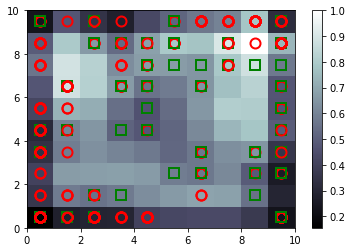

In [9]:
from minisom import MiniSom


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [10]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(9,9)], mappings[(8,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [16]:
pd.options.display.float_format = '{:,1f}'.format
frauds

array([[  5.64804248e-01,   0.00000000e+00,   4.07218045e-01,
          1.25000000e-01,   5.00000000e-01,   1.53846154e-01,
          5.00000000e-01,   1.75438596e-02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   5.80000000e-01,   0.00000000e+00],
       [  7.82624365e-01,   0.00000000e+00,   4.13533835e-02,
          4.46428571e-02,   5.00000000e-01,   7.69230769e-01,
          3.75000000e-01,   8.77192982e-03,   0.00000000e+00,
          1.00000000e+00,   1.49253731e-02,   0.00000000e+00,
          5.00000000e-01,   5.40000000e-02,   9.80000000e-04],
       [  5.84745865e-01,   0.00000000e+00,   1.39097744e-01,
          6.55357143e-02,   5.00000000e-01,   3.07692308e-01,
          2.50000000e-01,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.49253731e-02,   0.00000000e+00,
          5.00000000e-01,   1.00000000e-01,   5.30000000e-04],
       [  4.02244033e-01,   0.00000000e+00,   9.51879699e-02,
     